###         Data Cleaning   

In [238]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Import Bokeh for further visualizations
from bokeh.plotting import Figure, output_notebook, show, save
from bokeh.models import ColumnDataSource, HoverTool, GroupFilter, CDSView

output_notebook()

import warnings
warnings.filterwarnings('ignore')

Loading BokehJS ...

In [239]:
#Read DataFrame

df= pd.read_csv('adidassales.csv')

In [240]:
#Display a subset of the DataFrame containing the first 5 rows.

df.head(5)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,01/01/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,02/01/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,03/01/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,04/01/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,05/01/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store


In [241]:
#Check if there is any duplicate rows by using .duplicated() method where False indicates that a row is not a duplicate.

duplicate_rows = df.duplicated()
duplicate_rows

0       False
1       False
2       False
3       False
4       False
        ...  
9643    False
9644    False
9645    False
9646    False
9647    False
Length: 9648, dtype: bool

In [242]:
#Summary of a DataFrame, including information about the data types, non-null values, and memory usage.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB


In [243]:
#First, change the columns data types with correct format if necessary

#1-Change invoice date to time frame format

df['Invoice Date']= df['Invoice Date'].replace('/','-')
df['Invoice Date']= pd.to_datetime(df['Invoice Date'])


#2-Change values in Price per Unit, Units Sold, Total Sales, and Operating Profit to float numbers
#3-Drop $,. from Price per Unit and change data type to float

df[['Price per Unit','Total Sales', 'Operating Profit','Units Sold']] = df[['Price per Unit','Total Sales', 'Operating Profit','Units Sold']].replace('[\$,]', '', regex=True).astype(float)

df['Operating Margin']= df['Operating Margin'].str.replace('%','').astype(float)

df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   float64       
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memory usage: 980.0+ KB


,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50.0,In-store
1,Foot Locker,1185732,2020-02-01,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30.0,In-store
2,Foot Locker,1185732,2020-03-01,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,35.0,In-store
3,Foot Locker,1185732,2020-04-01,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,35.0,In-store
4,Foot Locker,1185732,2020-05-01,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,30.0,In-store


In [244]:
# Add new columns 'Year' and 'Month' to the data frame
df_new= df.copy()
df_new['Year']=df['Invoice Date'].dt.year
df_new['Month']=df['Invoice Date'].dt.month
df_new

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Year,Month
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50.0,In-store,2020,1
1,Foot Locker,1185732,2020-02-01,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30.0,In-store,2020,2
2,Foot Locker,1185732,2020-03-01,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,35.0,In-store,2020,3
3,Foot Locker,1185732,2020-04-01,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,35.0,In-store,2020,4
4,Foot Locker,1185732,2020-05-01,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,30.0,In-store,2020,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64.0,3200.0,896.0,28.0,Outlet,2021,1
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105.0,4305.0,1378.0,32.0,Outlet,2021,1
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184.0,7544.0,2791.0,37.0,Outlet,2021,2
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70.0,2940.0,1235.0,42.0,Outlet,2021,2


In [245]:
#Review the statistical summary of the data to identify any anomalies or irregularities in the results. 


df_new.describe()

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Year,Month
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,45.216625,256.930037,93273.437500,34425.282131,42.299129,2020.865050,6.883603
std,2.636038e+04,14.705397,214.252030,141916.016727,54193.124141,9.719742,0.341688,3.393912
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,10.000000,2020.000000,1.000000
25%,1.185732e+06,35.000000,106.000000,4254.500000,1922.000000,35.000000,2021.000000,4.000000
50%,1.185732e+06,45.000000,176.000000,9576.000000,4371.500000,41.000000,2021.000000,7.000000
75%,1.185732e+06,55.000000,350.000000,150000.000000,52063.000000,49.000000,2021.000000,10.000000
max,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,80.000000,2021.000000,12.000000


In [246]:
# Check values where min =0 to see if there are any  anomalies.
df_new[df_new['Units Sold'] == 0]

#It is understood below that there were no sales on these dates

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Year,Month
1019,Foot Locker,1185732,2021-05-06,Midwest,Nebraska,Omaha,Women's Athletic Footwear,35.0,0.0,0.0,0.0,40.0,Outlet,2021,5
1025,Foot Locker,1185732,2021-11-06,Midwest,Nebraska,Omaha,Women's Athletic Footwear,30.0,0.0,0.0,0.0,40.0,Outlet,2021,11
4907,Foot Locker,1185732,2021-05-06,Midwest,Nebraska,Omaha,Women's Athletic Footwear,33.0,0.0,0.0,0.0,55.0,Online,2021,5
4913,Foot Locker,1185732,2021-11-06,Midwest,Nebraska,Omaha,Women's Athletic Footwear,27.0,0.0,0.0,0.0,53.0,Online,2021,11


In [247]:
df_new.describe(include='O')

,Retailer,Region,State,City,Product,Sales Method
count,9648,9648,9648,9648,9648,9648
unique,6,5,50,52,6,3
top,Foot Locker,West,California,Portland,Men's Athletic Footwear,Online
freq,2637,2448,432,360,1610,4889


In [248]:
# Check null / missing values values

df_new.isna().sum()  

#There is no null value.

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
Year                0
Month               0
dtype: int64

In [249]:
#Count distinct values in the specified years by using 'Invoice Date' column
df_new['Invoice Date'].dt.year.value_counts() 

2021    8346
2020    1302
Name: Invoice Date, dtype: int64

In [250]:
# Check if there are values written wrong in the above columns which data types are object.
# for loop, value_counts() and sort_index() are used to make the code more efficient and readable.

object_columns = ['Retailer', 'Region', 'State', 'City', 'Product', 'Sales Method']

for x in object_columns:
    new_df = pd.DataFrame(df_new[x].value_counts()).sort_index()
    print(new_df)
    print('----' * 5)
    


               Retailer
Amazon              949
Foot Locker        2637
Kohl's             1030
Sports Direct      2032
Walmart             626
West Gear          2374
--------------------
           Region
Midwest      1872
Northeast    2376
South        1728
Southeast    1224
West         2448
--------------------
                State
Alabama           216
Alaska            144
Arizona           216
Arkansas          216
California        432
Colorado          144
Connecticut       216
Delaware          144
Florida           360
Georgia           216
Hawaii            144
Idaho             216
Illinois          144
Indiana           144
Iowa              144
Kansas            144
Kentucky          144
Louisiana         216
Maine             144
Maryland          144
Massachusetts     216
Michigan          144
Minnesota         144
Mississippi       216
Missouri          144
Montana           144
Nebraska          144
Nevada            216
New Hampshire     216
New Jersey        144


### Exploratory Analysis

**-Explore total sales categorized by sales method and identify the sales method associated with the highest number of units sold**

In [251]:
salesmethod_unitsold= df_new.groupby('Sales Method')[['Units Sold']].count().sort_values(by='Units Sold', ascending=False)
salesmethod_unitsold.reset_index()



,Sales Method,Units Sold
0,Online,4889
1,Outlet,3019
2,In-store,1740


**-Exploring operating profits categorized by retailer, focusing on the year 2020 and identify the retailer with the highest operating profit during that period**

In [252]:
profit_retailer_2020= df_new[df_new['Year']== 2020].groupby('Retailer')[['Operating Profit']].sum(
                      ).sort_values(by='Operating Profit', ascending=False)
profit_retailer_2020.reset_index()

,Retailer,Operating Profit
0,West Gear,29457170.0
1,Foot Locker,15668795.0
2,Walmart,12156537.0
3,Sports Direct,5789940.0
4,Kohl's,303268.0


**-Finding the product that Amazon sold the most in 2021**

In [253]:
amazon_sales = df_new[(df_new['Retailer'] == 'Amazon') & (df_new['Year']== 2021)]
amazon_sales_by_product = amazon_sales.groupby('Product')['Units Sold'].sum().reset_index(
                          ).sort_values('Units Sold', ascending = False)
amazon_sales_by_product

,Product,Units Sold
2,Men's Street Footwear,54883.0
3,Women's Apparel,35885.0
1,Men's Athletic Footwear,31987.0
5,Women's Street Footwear,28629.0
0,Men's Apparel,24062.0
4,Women's Athletic Footwear,22544.0


 **-Finding the product with the maximum units sold each month**

In [254]:
max_units_sold_by_month = df_new.groupby(['Month', 'Product'])['Units Sold'].sum().sort_values(ascending=False).reset_index()
   
for month in max_units_sold_by_month['Month'].unique():
    max_units_for_month = max_units_sold_by_month[max_units_sold_by_month['Month'] == month]
    max_product_for_month = max_units_for_month.loc[max_units_for_month['Units Sold'].idxmax(), 'Product']

    print(f"For {month}, the product with the maximum units sold is: {max_product_for_month}")

For 10, the product with the maximum units sold is: Men's Street Footwear
For 6, the product with the maximum units sold is: Men's Street Footwear
For 12, the product with the maximum units sold is: Men's Street Footwear
For 4, the product with the maximum units sold is: Men's Street Footwear
For 9, the product with the maximum units sold is: Men's Street Footwear
For 8, the product with the maximum units sold is: Men's Street Footwear
For 7, the product with the maximum units sold is: Men's Street Footwear
For 5, the product with the maximum units sold is: Men's Street Footwear
For 11, the product with the maximum units sold is: Men's Street Footwear
For 3, the product with the maximum units sold is: Men's Street Footwear
For 1, the product with the maximum units sold is: Men's Street Footwear
For 2, the product with the maximum units sold is: Men's Street Footwear


**-Finding that how many Women's Street Footwears were sold by Walmart in December,2020**

In [255]:
walmart_df= df_new[(df_new['Retailer']=='Walmart')& (df_new['Year']==2020) & (df_new['Month']==12)& (
                                    df_new['Product']=="Women's Street Footwear")]
sold_product= walmart_df.groupby('Units Sold').sum()

sold_product
#Answer is none.

,Retailer ID,Price per Unit,Total Sales,Operating Profit,Operating Margin,Year,Month
Units Sold,,,,,,,


**-Finding the most sold product by Foot Locker in New York City on October 20, 2020**

In [256]:
footlocker_df=df_new[(df_new['Retailer']=='Foot Locker') & (df_new['City']=='Miami') & (
               df_new['Invoice Date']== '2020-10-20')]

ft_df= footlocker_df.groupby('Product').sum().sort_values(by='Units Sold', ascending= False)

most_sold_product = ft_df['Units Sold'].idxmax()

print("The most sold product is:", most_sold_product)


The most sold product is: Women's Athletic Footwear


### Data Visuzaliation

**-Histograms to understand the data distrubution**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027996130B08>,
      dtype=object)

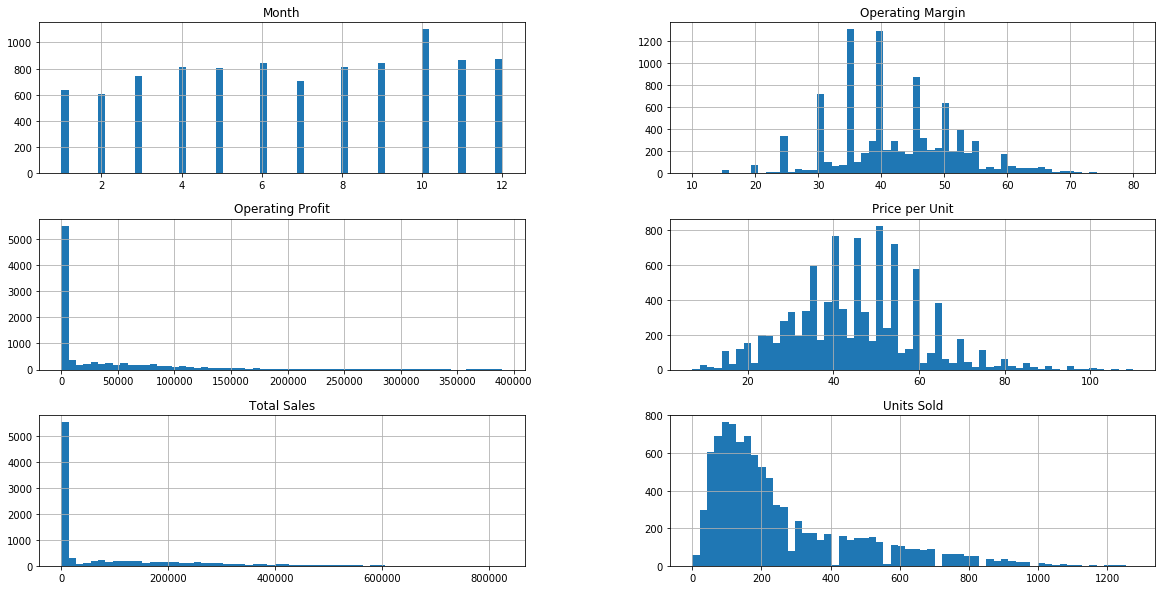

In [257]:
df_new_subset= df_new[['Price per Unit','Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin', 'Month']]

df_new_subset.hist(bins=60, figsize=(20,10))

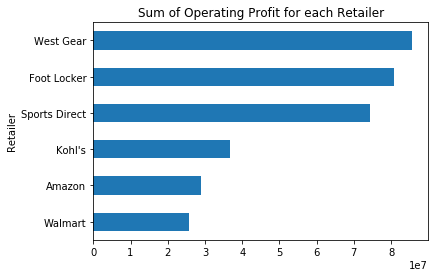

In [258]:
sale_mt = df_new.groupby('Retailer')['Operating Profit'].sum().sort_values(ascending=True)
sales_bar = sale_mt.plot(stacked=True, kind='barh', title= 'Sum of Operating Profit for each Retailer')

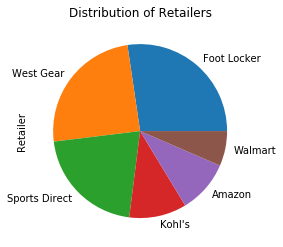

In [259]:
df_new['Retailer'].value_counts().plot(kind='pie', title='Distribution of Retailers');

**-Visual representation of how 'Units Sold' and 'Operating Profit' vary across different products using BOKEH. The tooltips offer additional information about each data point, and the legend provides a way to differentiate between different sales methods.**

In [260]:
origin_colors = {'In-store':'#CE1141', 'Online': 'orange', 'Outlet': 'blue'}
df_new['color_column'] = [origin_colors[x] for x in df_new['Sales Method']]

data = ColumnDataSource(df_new)

origin_tt = Figure(tools='', tooltips=[('Product', '@Product'), ('Units Sold', '@{Units Sold}')], width=500, height=300)

origin_tt.scatter(source=data, x='Units Sold', y='Operating Profit', fill_color='color_column', size=8, legend_group='Sales Method')

show(origin_tt)

**-Monthly change in operating profit, units sold, and total sales over time.**

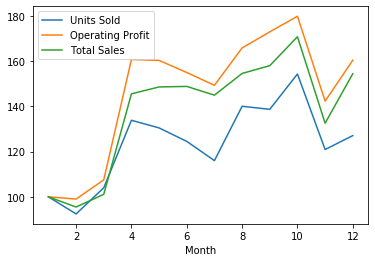

In [261]:
invoice = df_new.groupby('Month')['Units Sold', 'Operating Profit', 'Total Sales'].sum()
invoice

invoice_index = invoice.copy()
base = invoice_index.iloc[0]
invoice_index = (invoice_index/base)*100
invoice_index.head()

yi_fig = invoice_index.plot()
